# COGS 118B Project

### By Miguel Garcia and Janina Schuhmacher


In [2]:
import sklearn.metrics as metrics
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import check_X_y
import warnings
warnings.filterwarnings("ignore")

#name the columns
colnames=['age', 'workclass',  'fnlwgt', 'education', 
          'education-num', 'marital-status', 'occupation', 
          'relationship', 'race', 'sex', 'capital-gain', 
          'capital-loss', 'hours-per-week', 'native-country', 'income']

# read data in df
df = pd.read_csv('adult.data', names=colnames, header=None)


In [3]:
# display df header
data_top = df.head()   
data_top

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Drop null values

In [4]:
df.shape #before dropping nulls

(32561, 15)

In [5]:
for i in colnames:   #ignores all null values
    df = df[(df[i] != ' ?')]

In [8]:
df.shape #after dropping nulls

(30162, 15)

### Keep income only from Americans since it represents most of the data and remove trailing white space

In [15]:
#df['native-country'].value_counts()

In [12]:
df = df[(df['native-country'] == ' United-States')]
df = df.reset_index()

In [13]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
df.shape

(27504, 16)

### Visualize the distribution of the categorical features

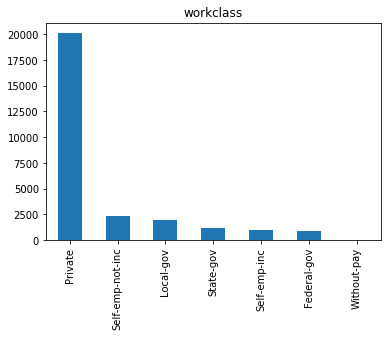

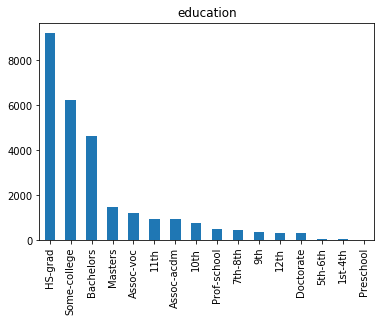

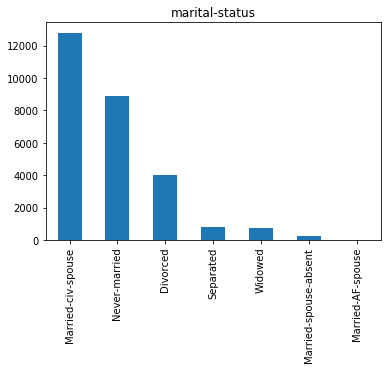

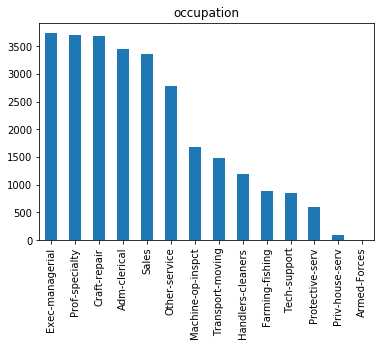

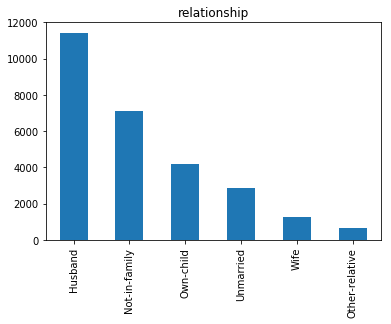

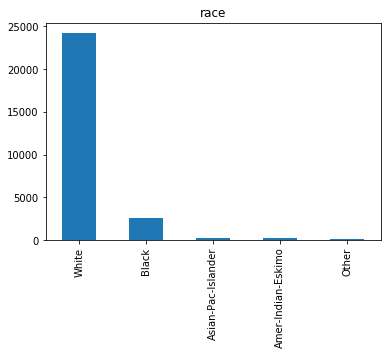

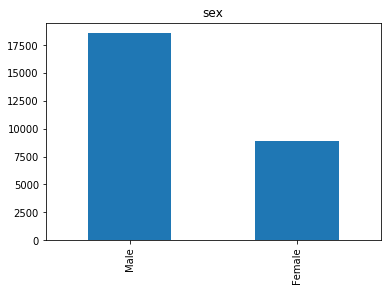

In [8]:
# plotting the frequency of the values

string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for col in string_columns: 
    fig, ax = plt.subplots()
    df[col].value_counts().plot(ax=ax, kind='bar', title = col)

## Visualize the continuous feautures

In [ ]:
# to do

### One hot encode

In [9]:
new_df = df[['age','fnlwgt','education-num','capital-gain',
             'capital-loss','hours-per-week']]  #non-categorical features (some are not important)
one_hot_cols = ['workclass', 'marital-status',
                'occupation','relationship','race']  #categorical features we care about
for i in one_hot_cols:  #for every categorical feature, onehot encode it
    new_df = new_df.join(pd.get_dummies(df[i],prefix = i))
    
new_df['income'] = pd.DataFrame((df['income'] == '>50K').astype(int))  #if greater than 50k 1 else 0 for label

In [10]:
for i in new_df.columns: #print new columns
    print(i)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass_Federal-gov
workclass_Local-gov
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Husband
relationship_Not-in-family
relationship_Other-relative
relationship_Own-child
relationship_Unmarried
relationship_Wife
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_Whit

In [11]:
new_df.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
7,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
8,37,280464,10,0,0,80,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
9,23,122272,13,0,0,30,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [12]:
new_df.shape   #shape after all cleaning

(27504, 46)

In [13]:
new_df = new_df.reset_index()

In [14]:
new_df.columns[1:46]

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'rela

### Get indexes for each individual feature and their respective names

In [15]:
ranges = [[1,2],[3,4],[4,5],[5,6],[6,7],[7,14],[14,21],[21,35],[35,41],[41,46],[1,46]]
columns = ['Age', 'Education','Capital Gain','Capital Loss','Hours Per Week',
           'Workclass','Marital Status','Occupation','Relationship','Race' ,'All Columns']

### Permutate/Shuffle the dataframe before applying algorithms

In [16]:
new_df = new_df.reindex(np.random.permutation(new_df.index))
new_df.head(10)

,index,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,income
23494,23494,28,376302,9,0,0,45,0,0,1,...,0,0,0,0,0,0,0,0,1,0
16713,16713,42,124792,9,7688,0,45,0,0,1,...,0,0,0,0,0,0,1,0,0,1
784,784,51,241843,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18716,18716,39,202937,14,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,1,1
23387,23387,24,217602,9,0,0,60,0,0,1,...,0,0,0,0,0,0,0,0,1,0
19240,19240,25,294400,4,0,0,60,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3406,3406,25,111058,12,0,0,40,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10458,10458,19,247298,8,0,0,20,0,0,1,...,0,1,0,0,0,0,0,1,0,0
21582,21582,30,251411,10,0,0,40,0,0,1,...,0,0,1,0,0,0,0,0,1,0
12491,12491,55,436861,14,14084,0,40,0,0,1,...,0,0,0,0,0,0,0,0,1,1


### Function to return results for each classifier

In [17]:
def return_results(clf,string,is_svm,is_dummy,i):
    print('---------- Results Summary for',string,'for the column:',columns[i],'----------')
    print()
    X = sc.fit_transform(new_df.iloc[:,ranges[i][0]:ranges[i][1]])  #apply standard scaler
    
    X_train = X[:num_training]   #training features 80% of data
    X_test = X[num_training:]    #testing features 20% of data
    Y_train = Y[:num_training]   #training labels 80% of data
    Y_test = Y[num_training:]   #testing labels 20% of data
    start_time = time.time()  #start counting time
    clf.fit(X_train, Y_train) #train algorithm
    scores = 0
    if is_svm == True:  #if it is an svm we do cross validation
        scores = cross_val_score(clf, X_test, Y_test, cv=5)  #5 cross validation folds for accuracy
        scores = max(scores)
    elif is_dummy == True:   #if it is dummy we calculate accuracy differently
        X_trainc, Y_trainc = \
                         check_X_y(X=X_train, y=Y_train)
        clf.fit(X=X_trainc, y=Y_trainc)
        scores = clf.score(X_test,Y_test)
                
    else:
        scores = clf.score(X_test,Y_test) #otherwise use default function
        
    print(str(time.time() - start_time)+" seconds for ", string, " to train") #end time counting and print
    print('Using' ,columns[i],'as a predictor for ' ,string,
          ' we get train accuracy of: ',clf.score(X_train,Y_train))  # train accuracy
    print('Using' ,columns[i],'as a predictor for ' ,string,
          ' we get test accuracy of: ',scores)  # calculate accuracy using 20%
    print()
    
    #confusion matrix
    cf_matrix = pd.DataFrame(confusion_matrix(Y_test, clf.predict(X_test)),index = ["True <50k", "True >50k"],
                columns = ["Pred <50k", "Pred >50k"])
    print('Confusion Matrix: ')
    print(cf_matrix)
    print()
    
    #f1 score
    score_f1 = f1_score(Y_test, clf.predict(X_test))
    print('F1-score is:',score_f1)

    #plot ROC
    fpr, tpr, thr = metrics.roc_curve(Y_test, clf.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic Curve for ' + str(string))
    plt.plot(fpr, tpr)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print()

### Classifiers we will use with different initializations

In [18]:
#classifiers we will use with different initializations
classifiers = [GaussianNB()]
classifiers.append(SVC(kernel = 'linear',gamma ='auto',random_state = 50))
classifiers.append(SVC(kernel = 'sigmoid',gamma ='auto',random_state = 50))
classifiers.append(SVC(kernel = 'rbf',gamma ='auto',random_state = 50)) #radial basis function kernel
classifiers.append(MLPClassifier(solver='lbfgs', alpha=10,hidden_layer_sizes=(5, 2)))
classifiers.append(MLPClassifier(activation = 'logistic',solver='lbfgs', alpha=10,hidden_layer_sizes=(5, 2)))
classifiers.append(MLPClassifier(activation = 'tanh',solver='lbfgs', alpha=10,hidden_layer_sizes=(5, 2)))
classifiers.append(DummyClassifier(strategy="most_frequent")) #“most_frequent”: always predicts the most frequent label in the training set.
classifiers.append(DummyClassifier(strategy="stratified")) #“stratified”: generates predictions by respecting the training set’s class distribution.
classifiers.append(DummyClassifier(strategy="prior"))#“prior”: always predicts the class that maximizes the class prior (like “most_frequent”) and predict_proba returns the class prior.

### Name of the Classifiers

In [19]:
names = ['GaussianNB','SVM with Linear Kernel','SVM with Sigmoid Kernel','SVM with Radial Basis Function Kernel',
        'Neural Network with ReLU activation','Neural Network with Logistic Sigmoid activation',
        'Neural Network with tanh activation', 'Dummy Classifier that predicts most frequent',
        'Dummy Classifier that makes stratified predictions',
        'Dummy Classifier that maximizes the prior']

### Calculate accuracy per each feature

--------------- Returning Algorithm Results Summary for the feature: Age ---------------

---------- Results Summary for GaussianNB for the column: Age ----------

0.01046609878540039 seconds for  GaussianNB  to train
Using Age as a predictor for  GaussianNB  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  GaussianNB  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


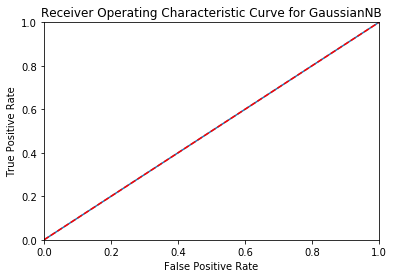


---------- Results Summary for SVM with Linear Kernel for the column: Age ----------

8.742581129074097 seconds for  SVM with Linear Kernel  to train
Using Age as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


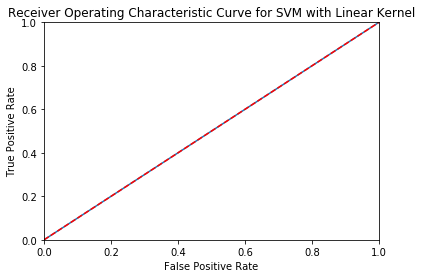


---------- Results Summary for SVM with Sigmoid Kernel for the column: Age ----------

18.751097679138184 seconds for  SVM with Sigmoid Kernel  to train
Using Age as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.6401854292596464
Using Age as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.6627272727272727

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3139        941
True >50k       1046        375

F1-score is: 0.27402265253927655


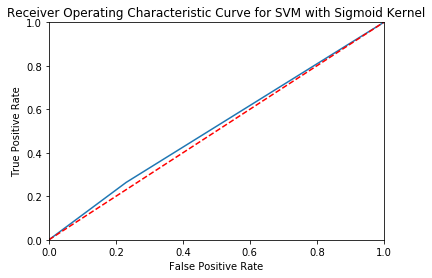


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Age ----------

15.465474605560303 seconds for  SVM with Radial Basis Function Kernel  to train
Using Age as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


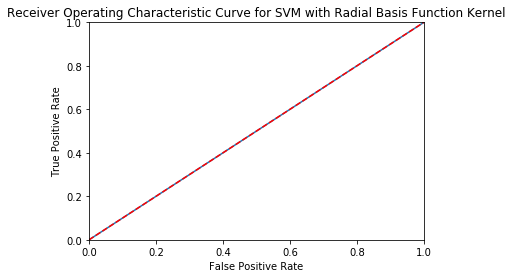


---------- Results Summary for Neural Network with ReLU activation for the column: Age ----------

0.28499698638916016 seconds for  Neural Network with ReLU activation  to train
Using Age as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


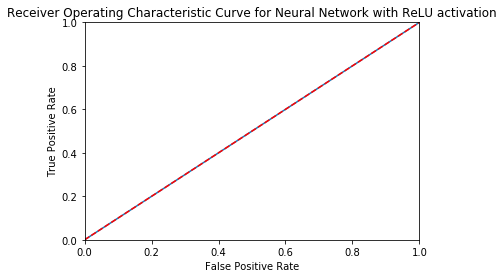


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Age ----------

0.46315979957580566 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Age as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


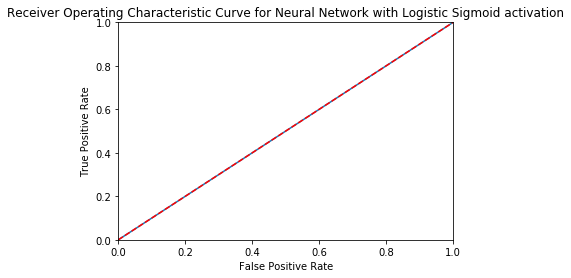


---------- Results Summary for Neural Network with tanh activation for the column: Age ----------

0.6006109714508057 seconds for  Neural Network with tanh activation  to train
Using Age as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


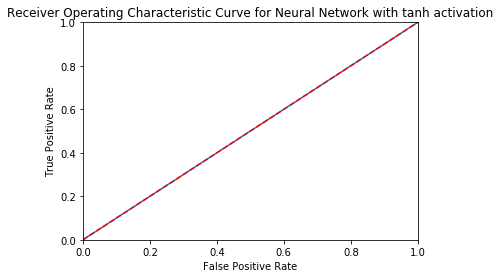


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Age ----------

0.002168893814086914 seconds for  Dummy Classifier that predicts most frequent  to train
Using Age as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


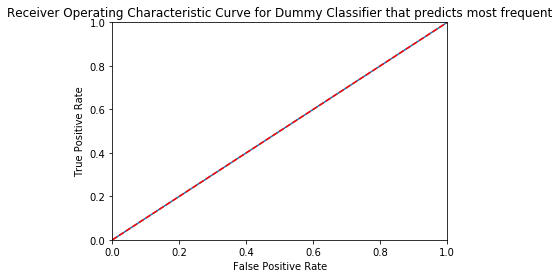


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Age ----------

0.007143259048461914 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Age as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6205062945961914
Using Age as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6178876567896746

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3023       1057
True >50k       1083        338

F1-score is: 0.2615942028985507


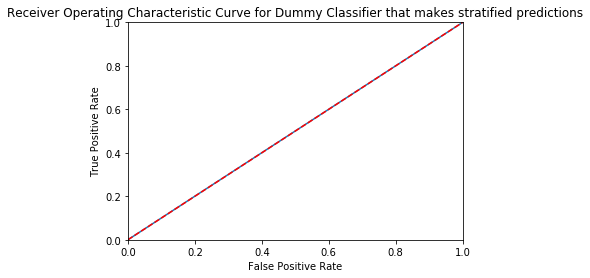


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Age ----------

0.004955768585205078 seconds for  Dummy Classifier that maximizes the prior  to train
Using Age as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Age as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


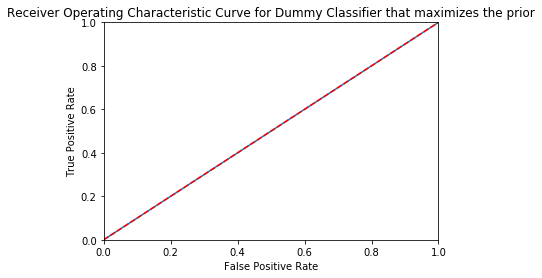


--------------- Returning Algorithm Results Summary for the feature: Education ---------------

---------- Results Summary for GaussianNB for the column: Education ----------

0.003892183303833008 seconds for  GaussianNB  to train
Using Education as a predictor for  GaussianNB  we get train accuracy of:  0.768440667181748
Using Education as a predictor for  GaussianNB  we get test accuracy of:  0.7680421741501545

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3912        168
True >50k       1108        313

F1-score is: 0.32912723449001047


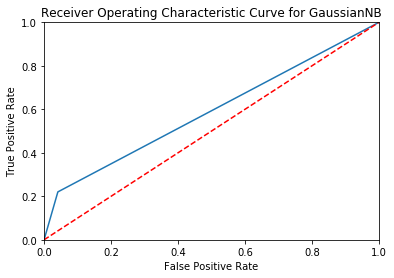


---------- Results Summary for SVM with Linear Kernel for the column: Education ----------

9.82773494720459 seconds for  SVM with Linear Kernel  to train
Using Education as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Education as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


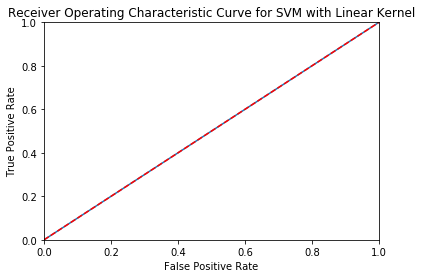


---------- Results Summary for SVM with Sigmoid Kernel for the column: Education ----------

18.028736352920532 seconds for  SVM with Sigmoid Kernel  to train
Using Education as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.6314593464527565
Using Education as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.78

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       2927       1153
True >50k        892        529

F1-score is: 0.34096036094102483


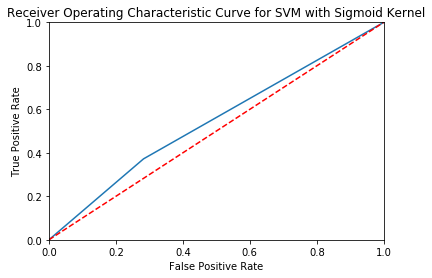


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Education ----------

16.699806690216064 seconds for  SVM with Radial Basis Function Kernel  to train
Using Education as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.768440667181748
Using Education as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.78

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3912        168
True >50k       1108        313

F1-score is: 0.32912723449001047


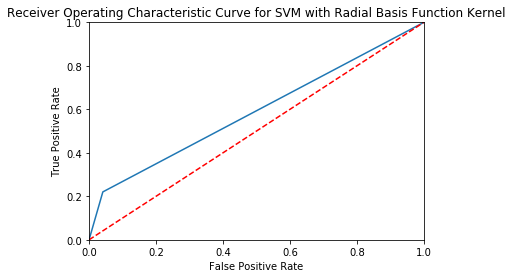


---------- Results Summary for Neural Network with ReLU activation for the column: Education ----------

1.0811398029327393 seconds for  Neural Network with ReLU activation  to train
Using Education as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.768440667181748
Using Education as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7680421741501545

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3912        168
True >50k       1108        313

F1-score is: 0.32912723449001047


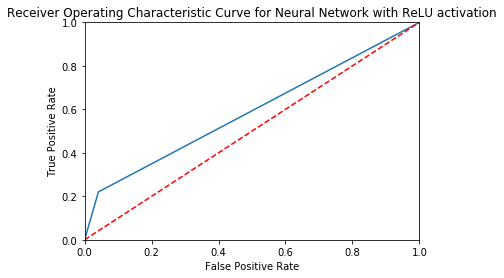


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Education ----------

0.7536575794219971 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Education as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.768440667181748
Using Education as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7680421741501545

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3912        168
True >50k       1108        313

F1-score is: 0.32912723449001047


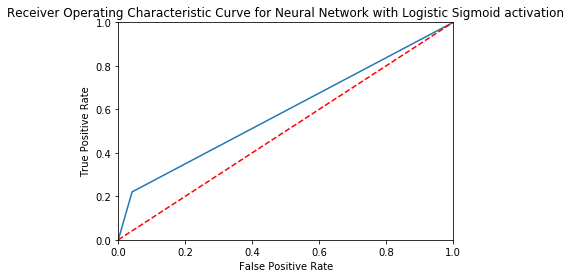


---------- Results Summary for Neural Network with tanh activation for the column: Education ----------

0.44612884521484375 seconds for  Neural Network with tanh activation  to train
Using Education as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.768440667181748
Using Education as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7680421741501545

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3912        168
True >50k       1108        313

F1-score is: 0.32912723449001047


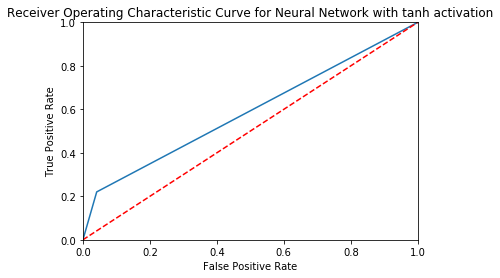


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Education ----------

0.003889322280883789 seconds for  Dummy Classifier that predicts most frequent  to train
Using Education as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Education as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


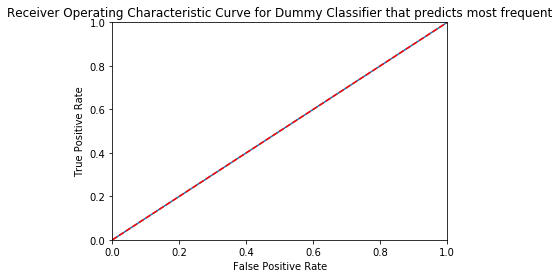


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Education ----------

0.0 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Education as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6230059537335818
Using Education as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6187965824395565

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3089        991
True >50k       1046        375

F1-score is: 0.2560230133045667


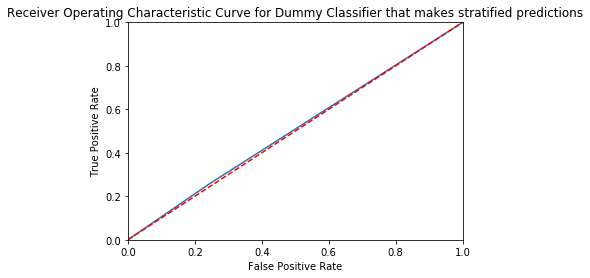


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Education ----------

0.003988742828369141 seconds for  Dummy Classifier that maximizes the prior  to train
Using Education as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Education as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


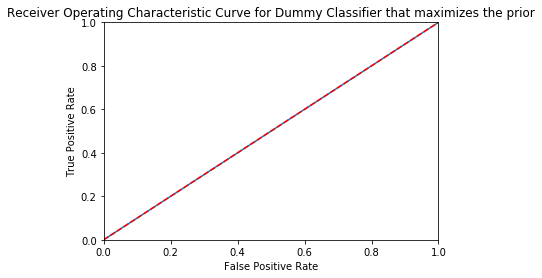


--------------- Returning Algorithm Results Summary for the feature: Capital Gain ---------------

---------- Results Summary for GaussianNB for the column: Capital Gain ----------

0.006850242614746094 seconds for  GaussianNB  to train
Using Capital Gain as a predictor for  GaussianNB  we get train accuracy of:  0.7807571694768896
Using Capital Gain as a predictor for  GaussianNB  we get test accuracy of:  0.7742228685693511

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3957        123
True >50k       1119        302

F1-score is: 0.3271939328277356


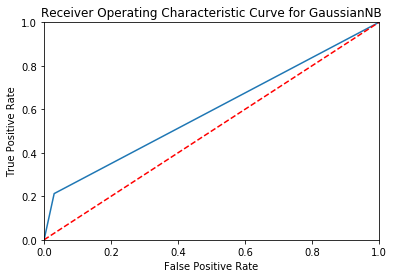


---------- Results Summary for SVM with Linear Kernel for the column: Capital Gain ----------

4.495284080505371 seconds for  SVM with Linear Kernel  to train
Using Capital Gain as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7866200063627687
Using Capital Gain as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7927272727272727

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4006         74
True >50k       1136        285

F1-score is: 0.3202247191011236


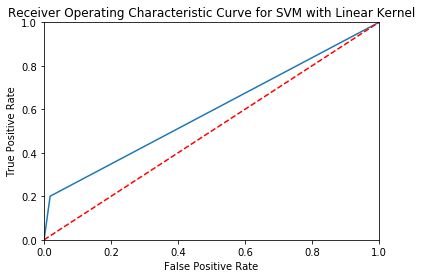


---------- Results Summary for SVM with Sigmoid Kernel for the column: Capital Gain ----------

10.849268436431885 seconds for  SVM with Sigmoid Kernel  to train
Using Capital Gain as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7622142435122483
Using Capital Gain as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7627272727272727

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3906        174
True >50k       1162        259

F1-score is: 0.27939590075512405


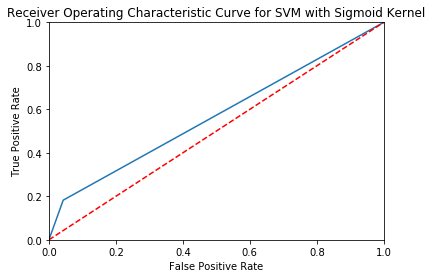


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Capital Gain ----------

8.52589750289917 seconds for  SVM with Radial Basis Function Kernel  to train
Using Capital Gain as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7897104940235422
Using Capital Gain as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7927272727272727

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4066         14
True >50k       1168        253

F1-score is: 0.29976303317535546


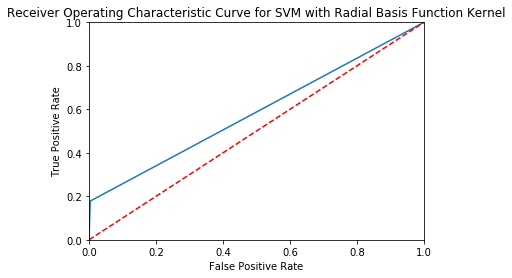


---------- Results Summary for Neural Network with ReLU activation for the column: Capital Gain ----------

0.4554018974304199 seconds for  Neural Network with ReLU activation  to train
Using Capital Gain as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7877107667136299
Using Capital Gain as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7822214142883113

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4018         62
True >50k       1136        285

F1-score is: 0.3223981900452489


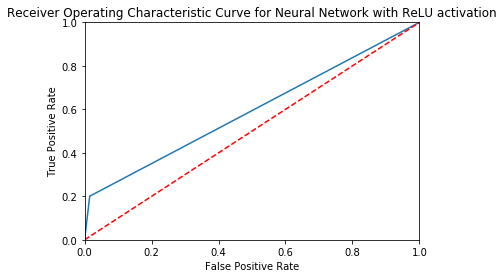


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Capital Gain ----------

0.4928712844848633 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Capital Gain as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.790437667590783
Using Capital Gain as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7854935466278858

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4045         35
True >50k       1145        276

F1-score is: 0.3187066974595843


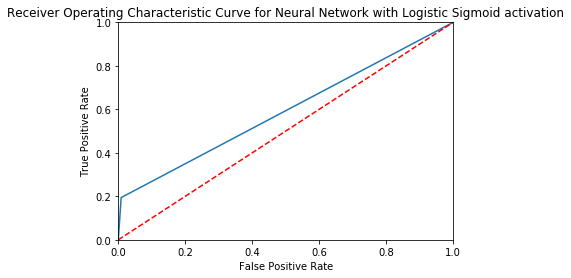


---------- Results Summary for Neural Network with tanh activation for the column: Capital Gain ----------

0.26003432273864746 seconds for  Neural Network with tanh activation  to train
Using Capital Gain as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7891196655001591
Using Capital Gain as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7847664061079803

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4062         18
True >50k       1166        255

F1-score is: 0.3010625737898466


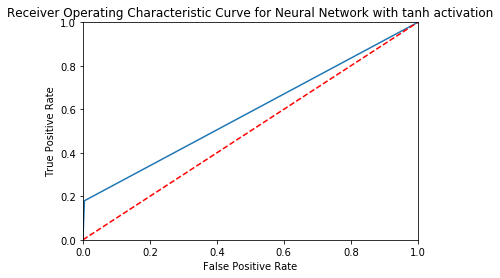


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Capital Gain ----------

0.0035822391510009766 seconds for  Dummy Classifier that predicts most frequent  to train
Using Capital Gain as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Capital Gain as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


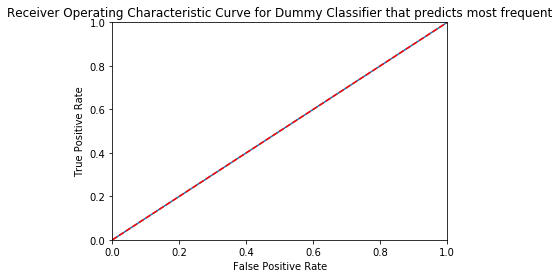


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Capital Gain ----------

0.0054433345794677734 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Capital Gain as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.62582375130664
Using Capital Gain as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6238865660788947

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3067       1013
True >50k       1032        389

F1-score is: 0.2661489587010237


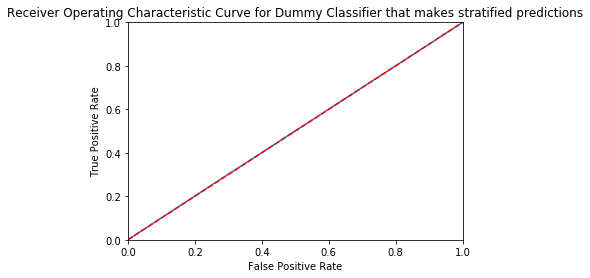


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Capital Gain ----------

0.004208087921142578 seconds for  Dummy Classifier that maximizes the prior  to train
Using Capital Gain as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Capital Gain as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


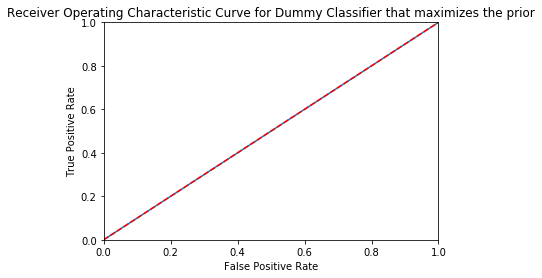


--------------- Returning Algorithm Results Summary for the feature: Capital Loss ---------------

---------- Results Summary for GaussianNB for the column: Capital Loss ----------

0.005837917327880859 seconds for  GaussianNB  to train
Using Capital Loss as a predictor for  GaussianNB  we get train accuracy of:  0.7497613961732491
Using Capital Loss as a predictor for  GaussianNB  we get test accuracy of:  0.7415015451736048

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3945        135
True >50k       1287        134

F1-score is: 0.15857988165680473


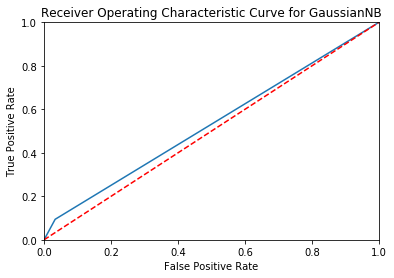


---------- Results Summary for SVM with Linear Kernel for the column: Capital Loss ----------

5.364161014556885 seconds for  SVM with Linear Kernel  to train
Using Capital Loss as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7501249829568695
Using Capital Loss as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7463636363636363

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3947        133
True >50k       1287        134

F1-score is: 0.15876777251184832


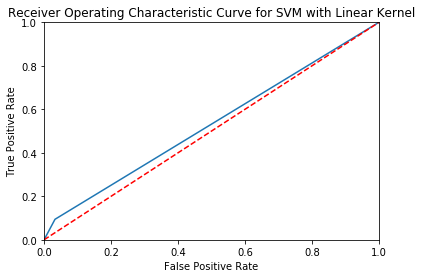


---------- Results Summary for SVM with Sigmoid Kernel for the column: Capital Loss ----------

13.119296312332153 seconds for  SVM with Sigmoid Kernel  to train
Using Capital Loss as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7476253238194792
Using Capital Loss as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.740909090909091

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3960        120
True >50k       1322         99

F1-score is: 0.12073170731707318


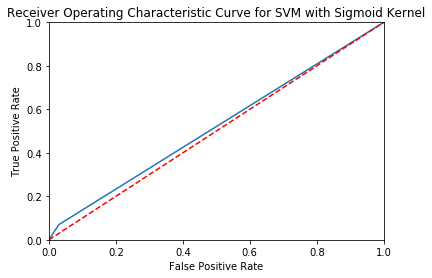


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Capital Loss ----------

9.214295864105225 seconds for  SVM with Radial Basis Function Kernel  to train
Using Capital Loss as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7633050038631096
Using Capital Loss as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7654545454545455

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4033         47
True >50k       1310        111

F1-score is: 0.14059531348955034


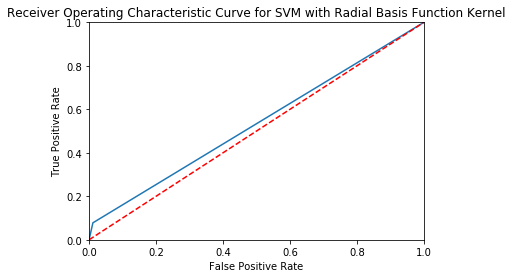


---------- Results Summary for Neural Network with ReLU activation for the column: Capital Loss ----------

1.8121371269226074 seconds for  Neural Network with ReLU activation  to train
Using Capital Loss as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7619870017724856
Using Capital Loss as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.752954008362116

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4020         60
True >50k       1299        122

F1-score is: 0.15221459762944478


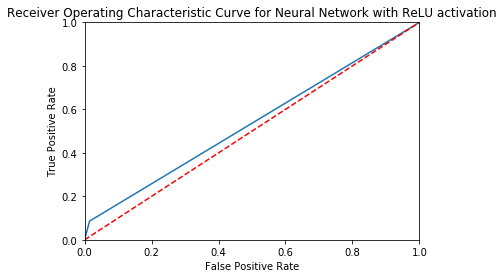


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Capital Loss ----------

0.6352770328521729 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Capital Loss as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7619870017724856
Using Capital Loss as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.752954008362116

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4020         60
True >50k       1299        122

F1-score is: 0.15221459762944478


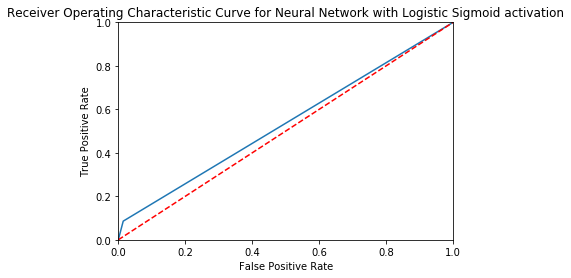


---------- Results Summary for Neural Network with tanh activation for the column: Capital Loss ----------

1.0197794437408447 seconds for  Neural Network with tanh activation  to train
Using Capital Loss as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7619870017724856
Using Capital Loss as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.752954008362116

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4020         60
True >50k       1299        122

F1-score is: 0.15221459762944478


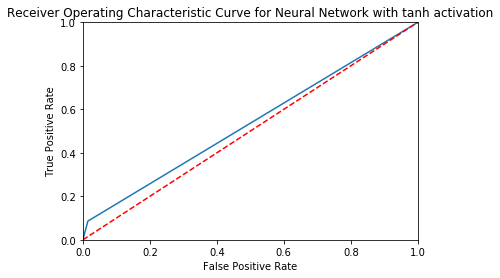


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Capital Loss ----------

0.003830432891845703 seconds for  Dummy Classifier that predicts most frequent  to train
Using Capital Loss as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Capital Loss as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


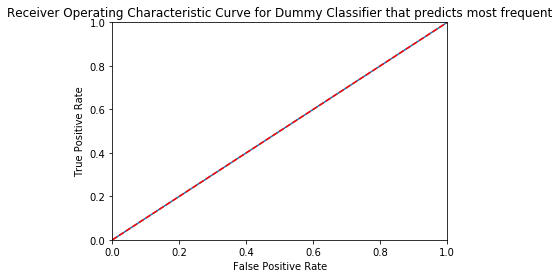


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Capital Loss ----------

0.004072666168212891 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Capital Loss as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6195973276371404
Using Capital Loss as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6231594255589893

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3051       1029
True >50k       1074        347

F1-score is: 0.255586592178771


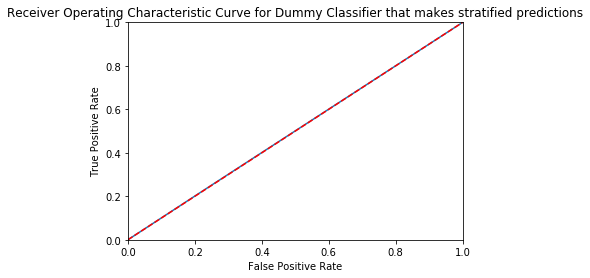


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Capital Loss ----------

0.0010025501251220703 seconds for  Dummy Classifier that maximizes the prior  to train
Using Capital Loss as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Capital Loss as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


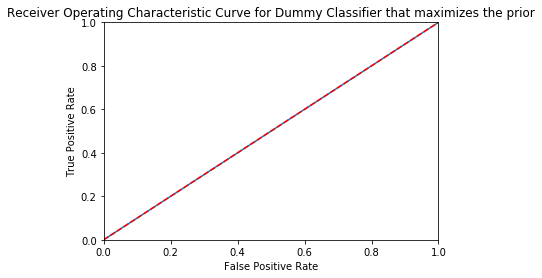


--------------- Returning Algorithm Results Summary for the feature: Hours Per Week ---------------

---------- Results Summary for GaussianNB for the column: Hours Per Week ----------

0.004436969757080078 seconds for  GaussianNB  to train
Using Hours Per Week as a predictor for  GaussianNB  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  GaussianNB  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


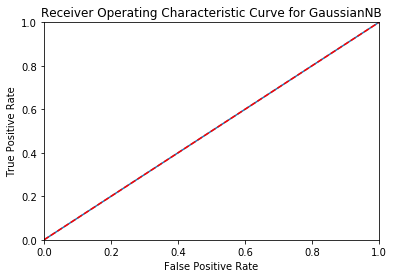


---------- Results Summary for SVM with Linear Kernel for the column: Hours Per Week ----------

10.760877847671509 seconds for  SVM with Linear Kernel  to train
Using Hours Per Week as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


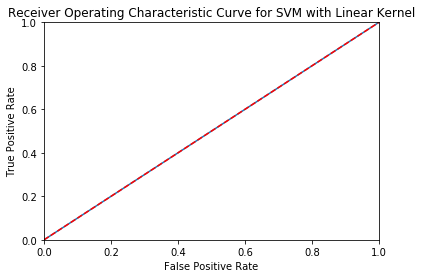


---------- Results Summary for SVM with Sigmoid Kernel for the column: Hours Per Week ----------

14.733669519424438 seconds for  SVM with Sigmoid Kernel  to train
Using Hours Per Week as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.6790892151070309
Using Hours Per Week as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.6836363636363636

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3386        694
True >50k       1086        335

F1-score is: 0.27346938775510204


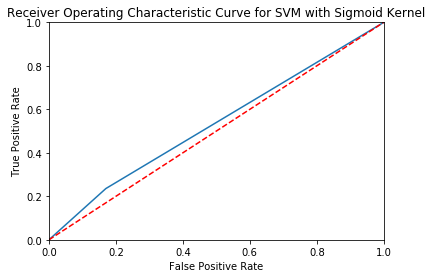


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Hours Per Week ----------

17.619354486465454 seconds for  SVM with Radial Basis Function Kernel  to train
Using Hours Per Week as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


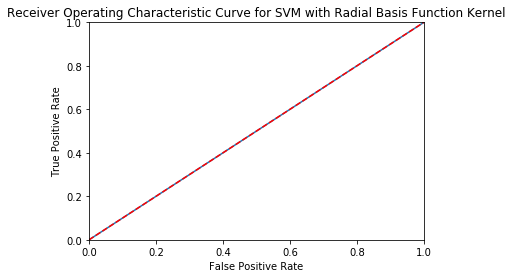


---------- Results Summary for Neural Network with ReLU activation for the column: Hours Per Week ----------

1.7863247394561768 seconds for  Neural Network with ReLU activation  to train
Using Hours Per Week as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


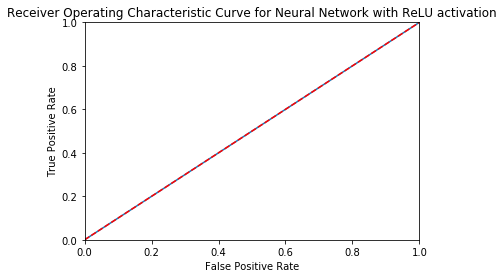


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Hours Per Week ----------

0.32100749015808105 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Hours Per Week as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


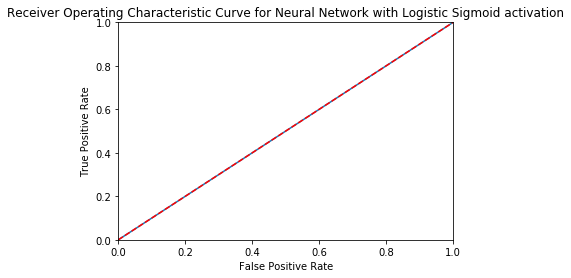


---------- Results Summary for Neural Network with tanh activation for the column: Hours Per Week ----------

0.41257429122924805 seconds for  Neural Network with tanh activation  to train
Using Hours Per Week as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


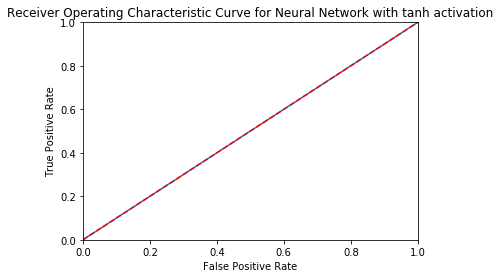


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Hours Per Week ----------

0.0032596588134765625 seconds for  Dummy Classifier that predicts most frequent  to train
Using Hours Per Week as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


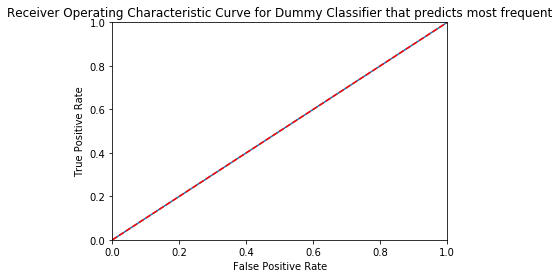


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Hours Per Week ----------

0.0064356327056884766 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Hours Per Week as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6232331954733445
Using Hours Per Week as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6149790947100527

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3067       1013
True >50k       1053        368

F1-score is: 0.268985095812633


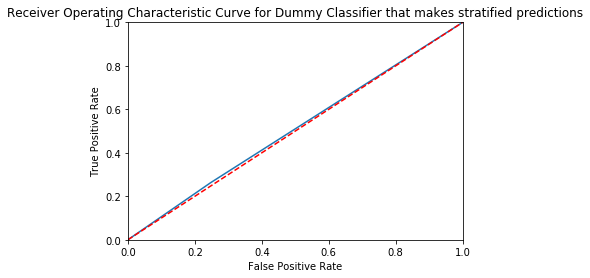


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Hours Per Week ----------

0.004184722900390625 seconds for  Dummy Classifier that maximizes the prior  to train
Using Hours Per Week as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Hours Per Week as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


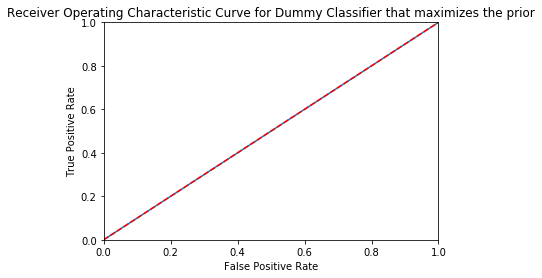


--------------- Returning Algorithm Results Summary for the feature: Workclass ---------------

---------- Results Summary for GaussianNB for the column: Workclass ----------

0.013440847396850586 seconds for  GaussianNB  to train
Using Workclass as a predictor for  GaussianNB  we get train accuracy of:  0.25378357496704995
Using Workclass as a predictor for  GaussianNB  we get test accuracy of:  0.2588620250863479

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k          3       4077
True >50k          0       1421

F1-score is: 0.4107529989882931


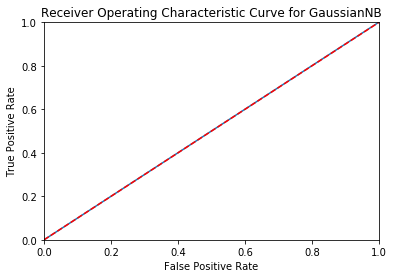


---------- Results Summary for SVM with Linear Kernel for the column: Workclass ----------

10.447967290878296 seconds for  SVM with Linear Kernel  to train
Using Workclass as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


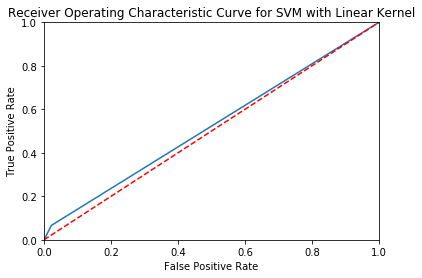


---------- Results Summary for SVM with Sigmoid Kernel for the column: Workclass ----------

19.019172430038452 seconds for  SVM with Sigmoid Kernel  to train
Using Workclass as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


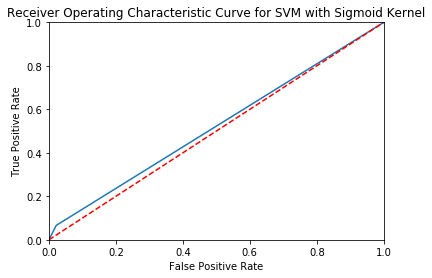


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Workclass ----------

16.80865240097046 seconds for  SVM with Radial Basis Function Kernel  to train
Using Workclass as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


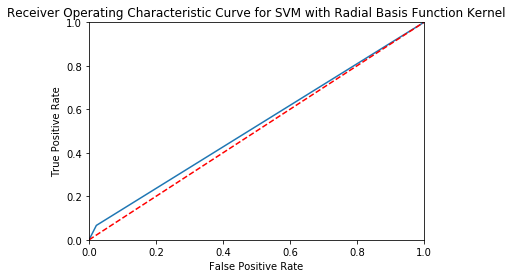


---------- Results Summary for Neural Network with ReLU activation for the column: Workclass ----------

0.7598843574523926 seconds for  Neural Network with ReLU activation  to train
Using Workclass as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.742592255953463

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


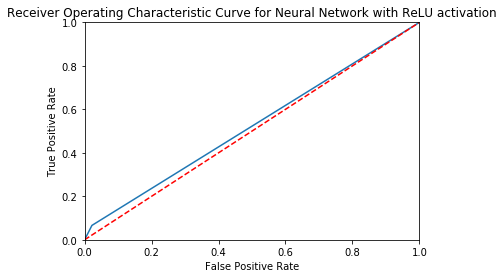


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Workclass ----------

0.8265328407287598 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Workclass as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.742592255953463

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


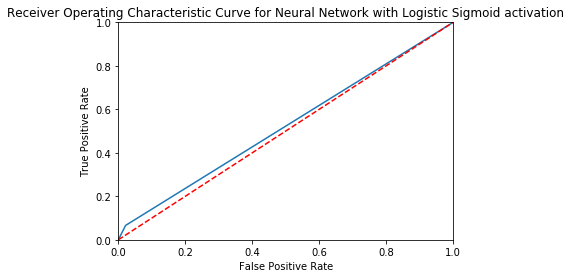


---------- Results Summary for Neural Network with tanh activation for the column: Workclass ----------

0.5809144973754883 seconds for  Neural Network with tanh activation  to train
Using Workclass as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7521247102667818
Using Workclass as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.742592255953463

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3991         89
True >50k       1327         94

F1-score is: 0.1172069825436409


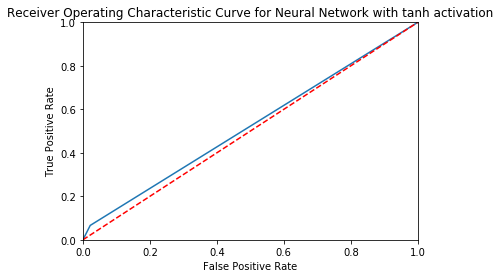


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Workclass ----------

0.004178762435913086 seconds for  Dummy Classifier that predicts most frequent  to train
Using Workclass as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Workclass as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


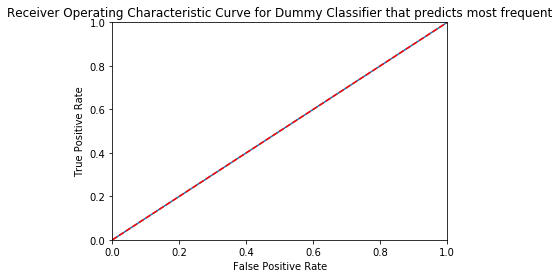


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Workclass ----------

0.0009953975677490234 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Workclass as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6238240239967278
Using Workclass as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6266133430285402

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3055       1025
True >50k       1089        332

F1-score is: 0.25880711545169166


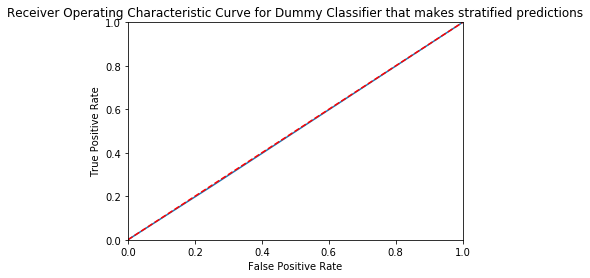


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Workclass ----------

0.005753040313720703 seconds for  Dummy Classifier that maximizes the prior  to train
Using Workclass as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Workclass as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


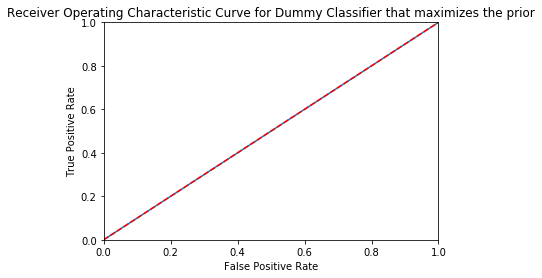


--------------- Returning Algorithm Results Summary for the feature: Marital Status ---------------

---------- Results Summary for GaussianNB for the column: Marital Status ----------

0.013607263565063477 seconds for  GaussianNB  to train
Using Marital Status as a predictor for  GaussianNB  we get train accuracy of:  0.7145843748579739
Using Marital Status as a predictor for  GaussianNB  we get test accuracy of:  0.7098709325577168

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       2709       1371
True >50k        225       1196

F1-score is: 0.5997993981945837


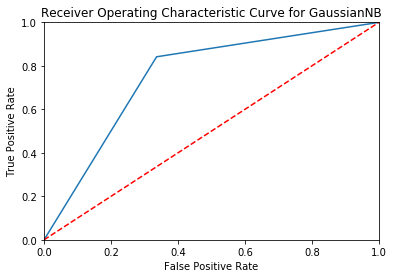


---------- Results Summary for SVM with Linear Kernel for the column: Marital Status ----------

10.868874549865723 seconds for  SVM with Linear Kernel  to train
Using Marital Status as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


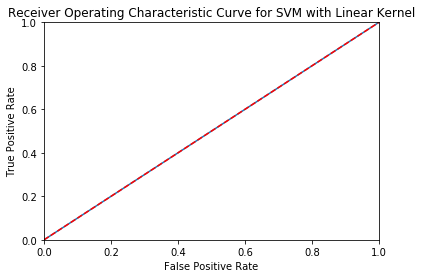


---------- Results Summary for SVM with Sigmoid Kernel for the column: Marital Status ----------

18.058387517929077 seconds for  SVM with Sigmoid Kernel  to train
Using Marital Status as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


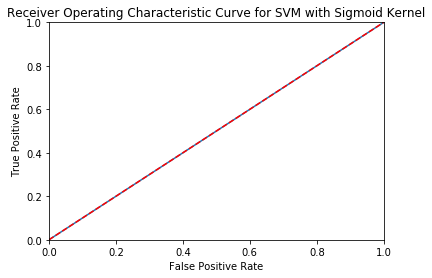


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Marital Status ----------

18.5114963054657 seconds for  SVM with Radial Basis Function Kernel  to train
Using Marital Status as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


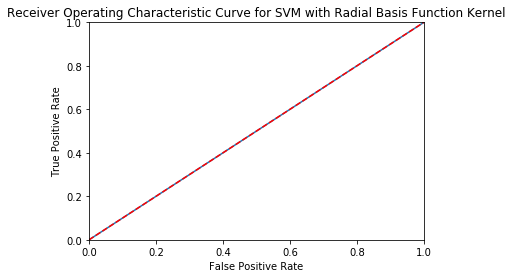


---------- Results Summary for Neural Network with ReLU activation for the column: Marital Status ----------

1.4830729961395264 seconds for  Neural Network with ReLU activation  to train
Using Marital Status as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


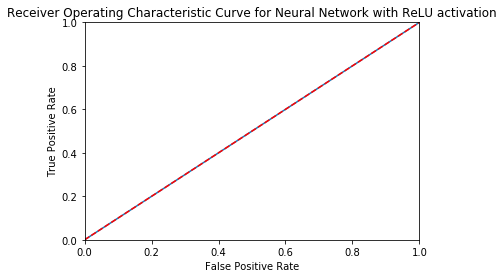


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Marital Status ----------

0.6226844787597656 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Marital Status as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


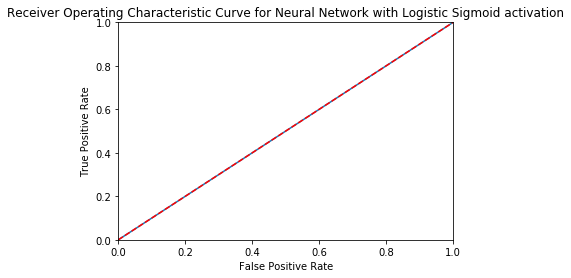


---------- Results Summary for Neural Network with tanh activation for the column: Marital Status ----------

1.044351577758789 seconds for  Neural Network with tanh activation  to train
Using Marital Status as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


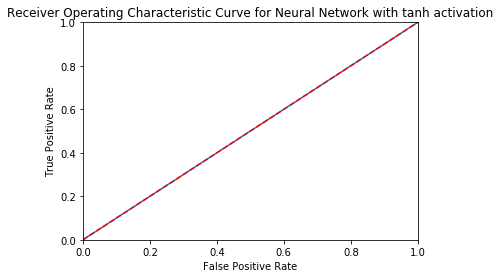


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Marital Status ----------

0.0038797855377197266 seconds for  Dummy Classifier that predicts most frequent  to train
Using Marital Status as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


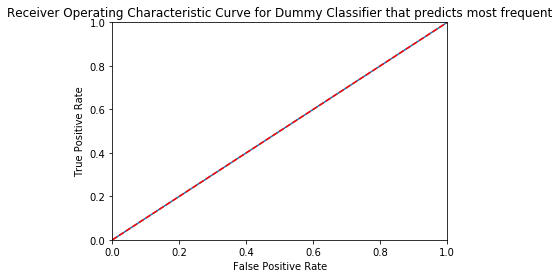


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Marital Status ----------

0.006262302398681641 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Marital Status as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6207335363359542
Using Marital Status as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.621523359389202

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3057       1023
True >50k       1091        330

F1-score is: 0.26024955436720143


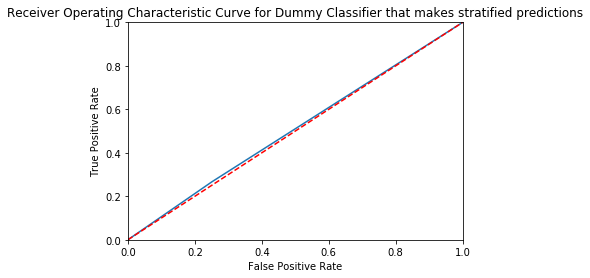


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Marital Status ----------

0.0030248165130615234 seconds for  Dummy Classifier that maximizes the prior  to train
Using Marital Status as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Marital Status as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


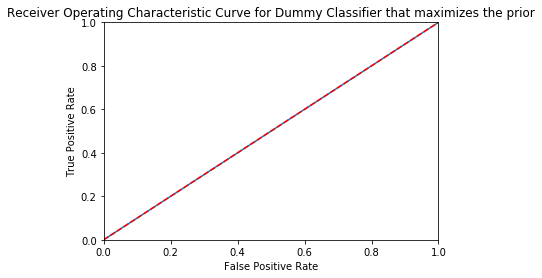


--------------- Returning Algorithm Results Summary for the feature: Occupation ---------------

---------- Results Summary for GaussianNB for the column: Occupation ----------

0.028598785400390625 seconds for  GaussianNB  to train
Using Occupation as a predictor for  GaussianNB  we get train accuracy of:  0.5818297504885698
Using Occupation as a predictor for  GaussianNB  we get test accuracy of:  0.5828031267042356

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       2022       2058
True >50k        237       1184

F1-score is: 0.5078275788119236


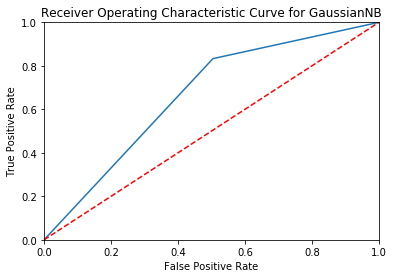


---------- Results Summary for SVM with Linear Kernel for the column: Occupation ----------

16.240262031555176 seconds for  SVM with Linear Kernel  to train
Using Occupation as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


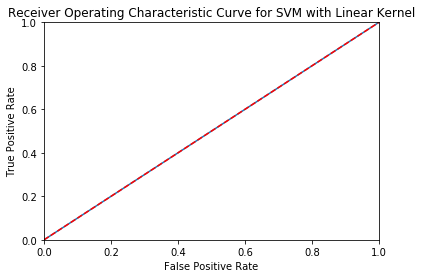


---------- Results Summary for SVM with Sigmoid Kernel for the column: Occupation ----------

25.08635711669922 seconds for  SVM with Sigmoid Kernel  to train
Using Occupation as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


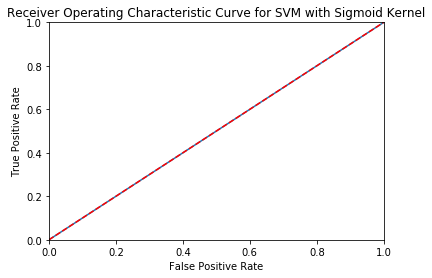


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Occupation ----------

26.54801082611084 seconds for  SVM with Radial Basis Function Kernel  to train
Using Occupation as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


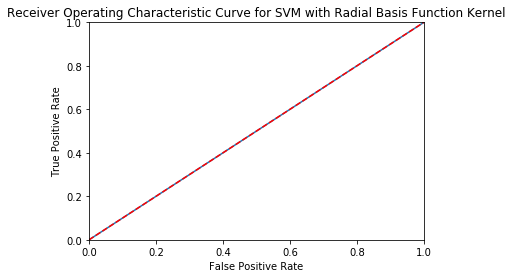


---------- Results Summary for Neural Network with ReLU activation for the column: Occupation ----------

1.4492499828338623 seconds for  Neural Network with ReLU activation  to train
Using Occupation as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


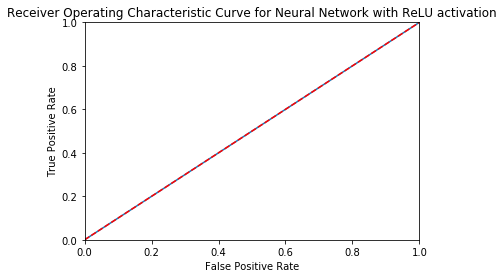


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Occupation ----------

0.9971628189086914 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Occupation as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


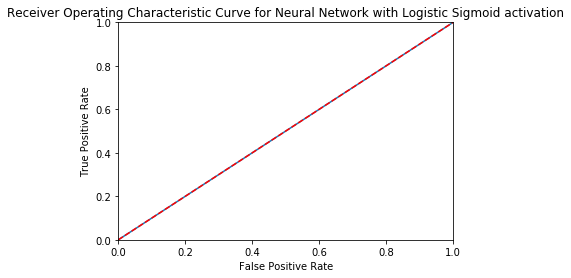


---------- Results Summary for Neural Network with tanh activation for the column: Occupation ----------

1.2923152446746826 seconds for  Neural Network with tanh activation  to train
Using Occupation as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


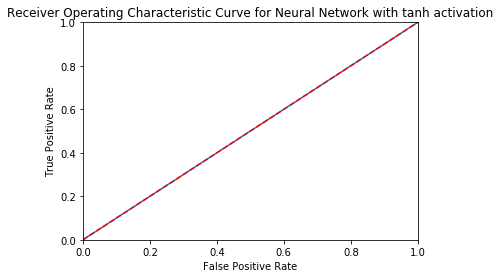


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Occupation ----------

0.00406956672668457 seconds for  Dummy Classifier that predicts most frequent  to train
Using Occupation as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


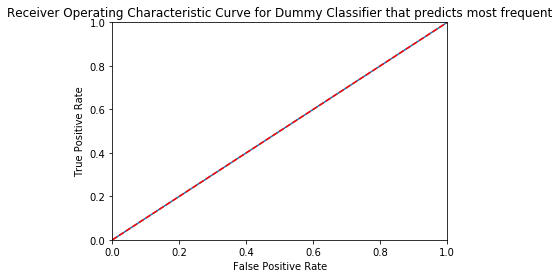


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Occupation ----------

0.004012346267700195 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Occupation as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6205971912920966
Using Occupation as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6140701690601709

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3026       1054
True >50k       1060        361

F1-score is: 0.2563559322033898


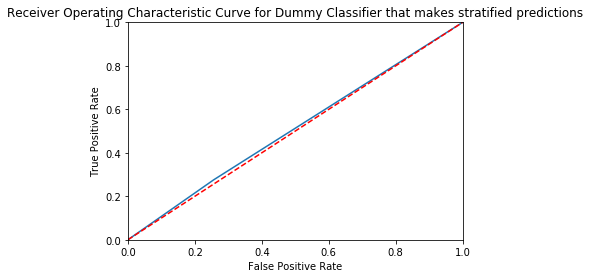


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Occupation ----------

0.0020673274993896484 seconds for  Dummy Classifier that maximizes the prior  to train
Using Occupation as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Occupation as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


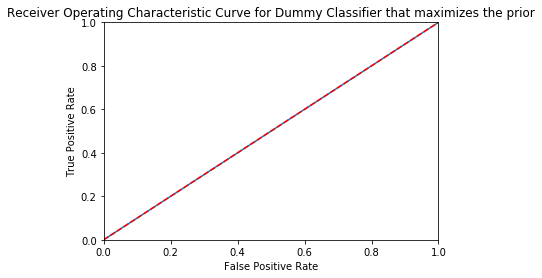


--------------- Returning Algorithm Results Summary for the feature: Relationship ---------------

---------- Results Summary for GaussianNB for the column: Relationship ----------

0.012434959411621094 seconds for  GaussianNB  to train
Using Relationship as a predictor for  GaussianNB  we get train accuracy of:  0.7181747943462256
Using Relationship as a predictor for  GaussianNB  we get test accuracy of:  0.7127794946373387

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       2732       1348
True >50k        232       1189

F1-score is: 0.6008084891359272


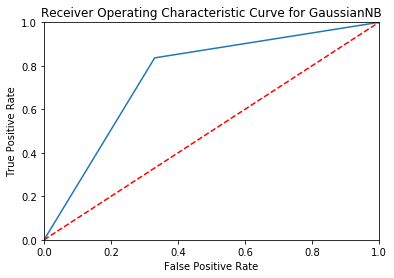


---------- Results Summary for SVM with Linear Kernel for the column: Relationship ----------

10.83066725730896 seconds for  SVM with Linear Kernel  to train
Using Relationship as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7471708403399536
Using Relationship as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7472727272727273

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3978        102
True >50k       1311        110

F1-score is: 0.13472137170851195


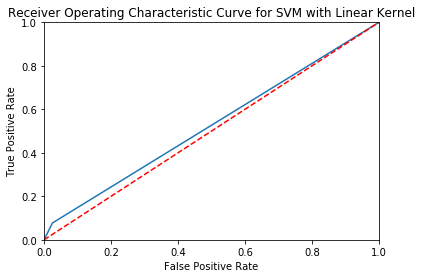


---------- Results Summary for SVM with Sigmoid Kernel for the column: Relationship ----------

17.991748332977295 seconds for  SVM with Sigmoid Kernel  to train
Using Relationship as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7471708403399536
Using Relationship as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7472727272727273

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3978        102
True >50k       1311        110

F1-score is: 0.13472137170851195


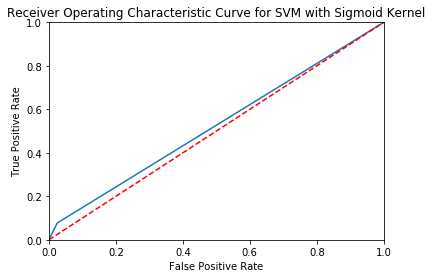


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Relationship ----------

17.28354549407959 seconds for  SVM with Radial Basis Function Kernel  to train
Using Relationship as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7471708403399536
Using Relationship as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7472727272727273

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3978        102
True >50k       1311        110

F1-score is: 0.13472137170851195


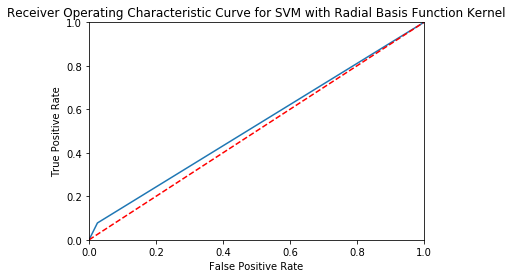


---------- Results Summary for Neural Network with ReLU activation for the column: Relationship ----------

2.517918586730957 seconds for  Neural Network with ReLU activation  to train
Using Relationship as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7471708403399536
Using Relationship as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7431376113433921

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3978        102
True >50k       1311        110

F1-score is: 0.13472137170851195


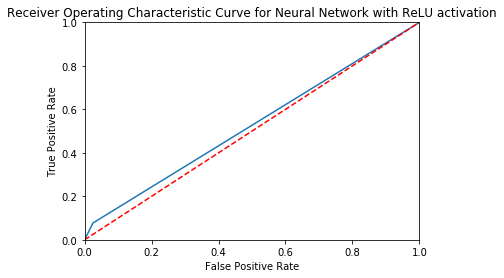


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Relationship ----------

1.2701122760772705 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Relationship as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Relationship as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


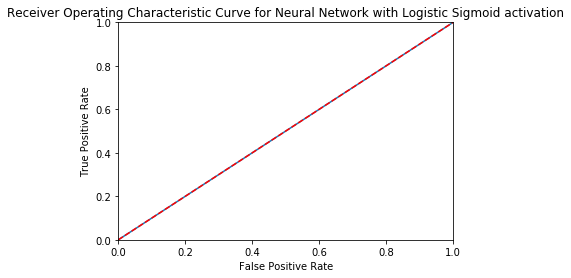


---------- Results Summary for Neural Network with tanh activation for the column: Relationship ----------

0.7456846237182617 seconds for  Neural Network with tanh activation  to train
Using Relationship as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7471708403399536
Using Relationship as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7431376113433921

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3978        102
True >50k       1311        110

F1-score is: 0.13472137170851195


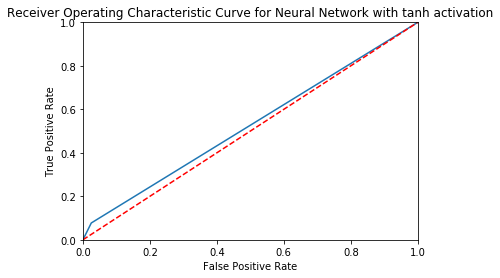


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Relationship ----------

0.00578618049621582 seconds for  Dummy Classifier that predicts most frequent  to train
Using Relationship as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Relationship as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


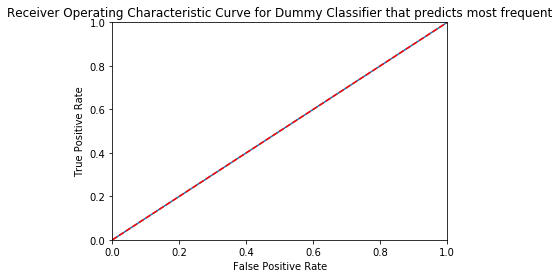


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Relationship ----------

0.0018188953399658203 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Relationship as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6263691314820706
Using Relationship as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6206144337393201

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3054       1026
True >50k       1075        346

F1-score is: 0.26287744227353466


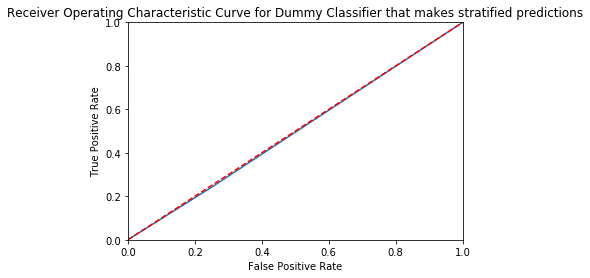


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Relationship ----------

0.0023345947265625 seconds for  Dummy Classifier that maximizes the prior  to train
Using Relationship as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Relationship as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


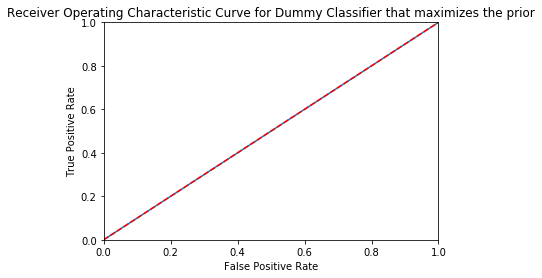


--------------- Returning Algorithm Results Summary for the feature: Race ---------------

---------- Results Summary for GaussianNB for the column: Race ----------

0.009208440780639648 seconds for  GaussianNB  to train
Using Race as a predictor for  GaussianNB  we get train accuracy of:  0.33772667363541337
Using Race as a predictor for  GaussianNB  we get test accuracy of:  0.3522995818942011

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k        596       3484
True >50k         79       1342

F1-score is: 0.42964623019049153


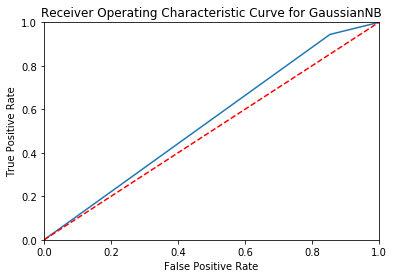


---------- Results Summary for SVM with Linear Kernel for the column: Race ----------

8.061087846755981 seconds for  SVM with Linear Kernel  to train
Using Race as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


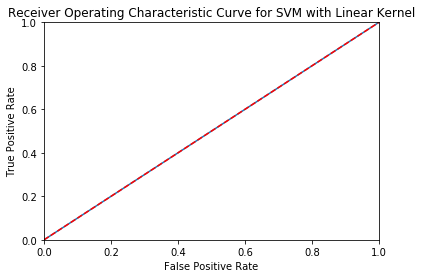


---------- Results Summary for SVM with Sigmoid Kernel for the column: Race ----------

14.574541807174683 seconds for  SVM with Sigmoid Kernel  to train
Using Race as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


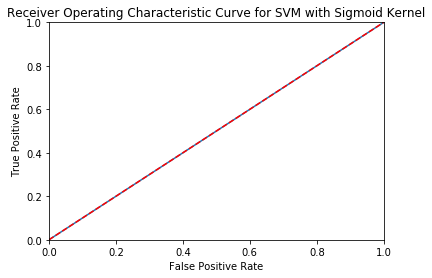


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: Race ----------

13.798773288726807 seconds for  SVM with Radial Basis Function Kernel  to train
Using Race as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.7418181818181818

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


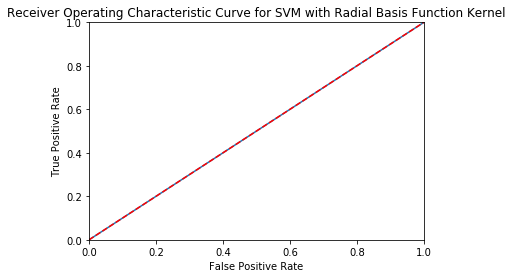


---------- Results Summary for Neural Network with ReLU activation for the column: Race ----------

0.7316408157348633 seconds for  Neural Network with ReLU activation  to train
Using Race as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


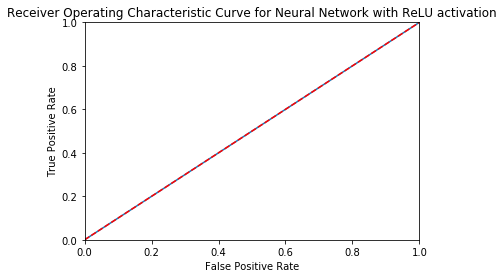


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: Race ----------

0.5251355171203613 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using Race as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


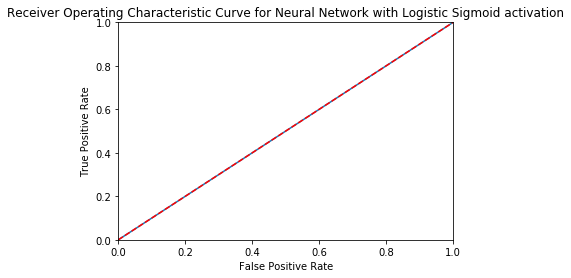


---------- Results Summary for Neural Network with tanh activation for the column: Race ----------

0.4037196636199951 seconds for  Neural Network with tanh activation  to train
Using Race as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


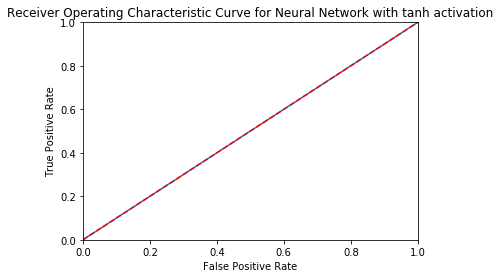


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: Race ----------

0.0031211376190185547 seconds for  Dummy Classifier that predicts most frequent  to train
Using Race as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


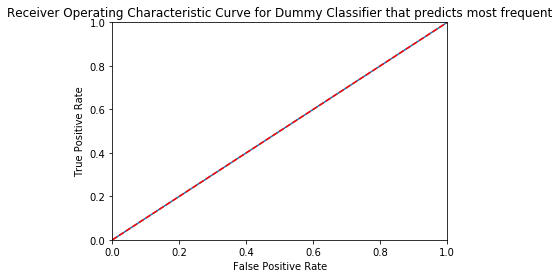


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: Race ----------

0.003830432891845703 seconds for  Dummy Classifier that makes stratified predictions  to train
Using Race as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6220060900786256
Using Race as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6191601526995092

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3046       1034
True >50k       1029        392

F1-score is: 0.2513426423200859


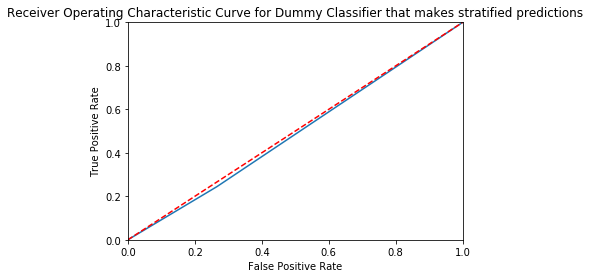


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: Race ----------

0.006140470504760742 seconds for  Dummy Classifier that maximizes the prior  to train
Using Race as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using Race as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


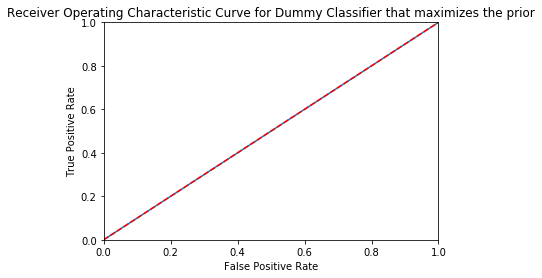


--------------- Returning Algorithm Results Summary for the feature: All Columns ---------------

---------- Results Summary for GaussianNB for the column: All Columns ----------

0.09114480018615723 seconds for  GaussianNB  to train
Using All Columns as a predictor for  GaussianNB  we get train accuracy of:  0.6580466300049993
Using All Columns as a predictor for  GaussianNB  we get test accuracy of:  0.6604253772041447

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       2292       1788
True >50k         80       1341

F1-score is: 0.5894505494505494


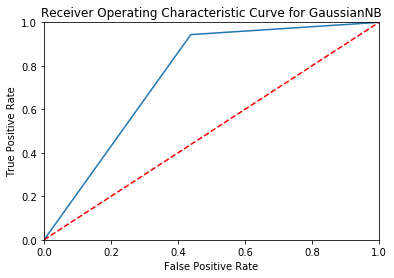


---------- Results Summary for SVM with Linear Kernel for the column: All Columns ----------

60.05504584312439 seconds for  SVM with Linear Kernel  to train
Using All Columns as a predictor for  SVM with Linear Kernel  we get train accuracy of:  0.8467027223560424
Using All Columns as a predictor for  SVM with Linear Kernel  we get test accuracy of:  0.850909090909091

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3772        308
True >50k        557        864

F1-score is: 0.6664095642113382


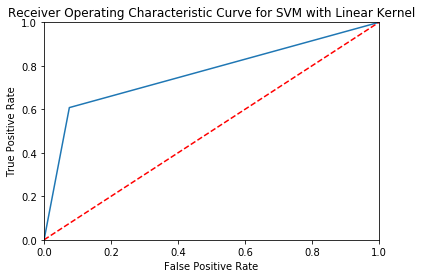


---------- Results Summary for SVM with Sigmoid Kernel for the column: All Columns ----------

51.880640268325806 seconds for  SVM with Sigmoid Kernel  to train
Using All Columns as a predictor for  SVM with Sigmoid Kernel  we get train accuracy of:  0.7806662727809844
Using All Columns as a predictor for  SVM with Sigmoid Kernel  we get test accuracy of:  0.8254545454545454

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3537        543
True >50k        617        804

F1-score is: 0.5809248554913296


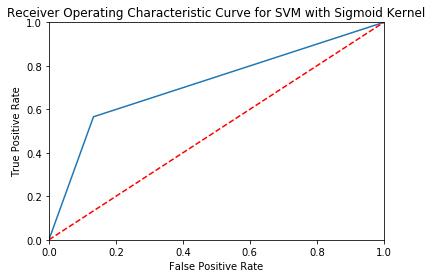


---------- Results Summary for SVM with Radial Basis Function Kernel for the column: All Columns ----------

48.02077531814575 seconds for  SVM with Radial Basis Function Kernel  to train
Using All Columns as a predictor for  SVM with Radial Basis Function Kernel  we get train accuracy of:  0.856065082034268
Using All Columns as a predictor for  SVM with Radial Basis Function Kernel  we get test accuracy of:  0.8463636363636363

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3773        307
True >50k        563        858

F1-score is: 0.6635730858468678


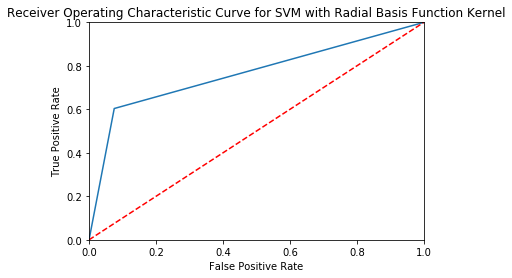


---------- Results Summary for Neural Network with ReLU activation for the column: All Columns ----------

7.269169569015503 seconds for  Neural Network with ReLU activation  to train
Using All Columns as a predictor for  Neural Network with ReLU activation  we get train accuracy of:  0.8523383175021588
Using All Columns as a predictor for  Neural Network with ReLU activation  we get test accuracy of:  0.8487547718596619

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3774        306
True >50k        526        895

F1-score is: 0.6826849733028223


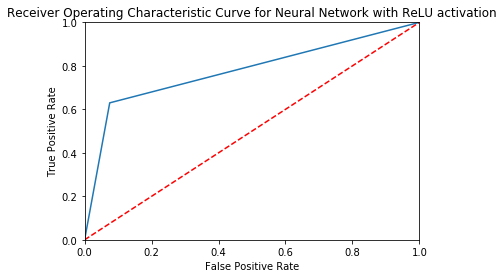


---------- Results Summary for Neural Network with Logistic Sigmoid activation for the column: All Columns ----------

5.389776945114136 seconds for  Neural Network with Logistic Sigmoid activation  to train
Using All Columns as a predictor for  Neural Network with Logistic Sigmoid activation  we get train accuracy of:  0.8547925282915966
Using All Columns as a predictor for  Neural Network with Logistic Sigmoid activation  we get test accuracy of:  0.8491183421196146

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3768        312
True >50k        518        903

F1-score is: 0.6851289833080425


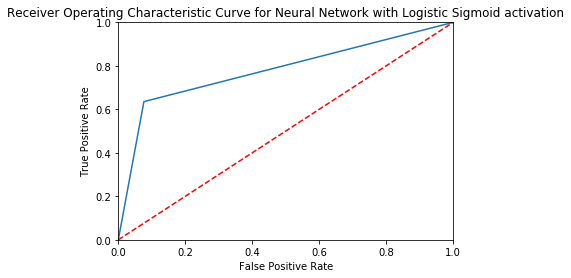


---------- Results Summary for Neural Network with tanh activation for the column: All Columns ----------

6.651590824127197 seconds for  Neural Network with tanh activation  to train
Using All Columns as a predictor for  Neural Network with tanh activation  we get train accuracy of:  0.8546107348997863
Using All Columns as a predictor for  Neural Network with tanh activation  we get test accuracy of:  0.8491183421196146

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3786        294
True >50k        536        885

F1-score is: 0.6807692307692308


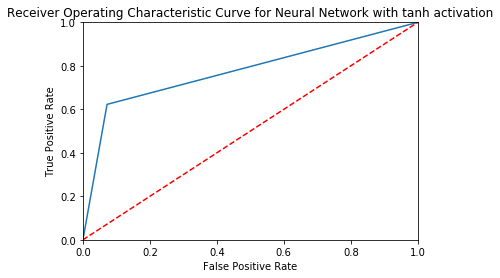


---------- Results Summary for Dummy Classifier that predicts most frequent for the column: All Columns ----------

0.008001565933227539 seconds for  Dummy Classifier that predicts most frequent  to train
Using All Columns as a predictor for  Dummy Classifier that predicts most frequent  we get train accuracy of:  0.7466709085124755
Using All Columns as a predictor for  Dummy Classifier that predicts most frequent  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


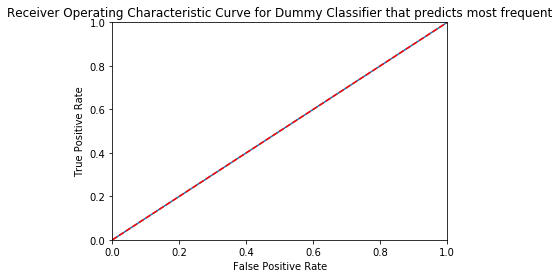


---------- Results Summary for Dummy Classifier that makes stratified predictions for the column: All Columns ----------

0.007172107696533203 seconds for  Dummy Classifier that makes stratified predictions  to train
Using All Columns as a predictor for  Dummy Classifier that makes stratified predictions  we get train accuracy of:  0.6235967822569649
Using All Columns as a predictor for  Dummy Classifier that makes stratified predictions  we get test accuracy of:  0.6187965824395565

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       3044       1036
True >50k       1085        336

F1-score is: 0.26454644018792917


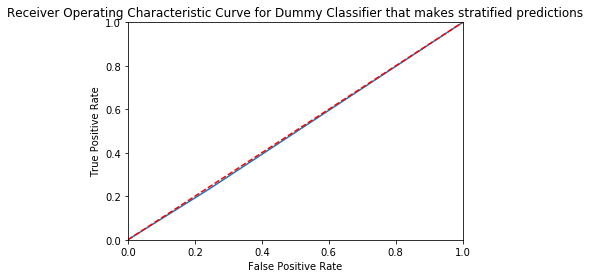


---------- Results Summary for Dummy Classifier that maximizes the prior for the column: All Columns ----------

0.009785652160644531 seconds for  Dummy Classifier that maximizes the prior  to train
Using All Columns as a predictor for  Dummy Classifier that maximizes the prior  we get train accuracy of:  0.7466709085124755
Using All Columns as a predictor for  Dummy Classifier that maximizes the prior  we get test accuracy of:  0.7416833303035811

Confusion Matrix: 
           Pred <50k  Pred >50k
True <50k       4080          0
True >50k       1421          0

F1-score is: 0.0


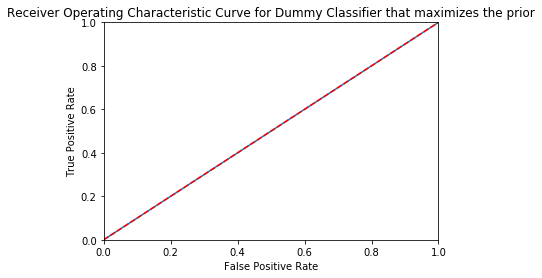

In [20]:
Y = np.array(new_df.iloc[:,46:47]) #labels
num_training = int(0.8*Y.shape[0])  #80% of the data for training
sc = StandardScaler()

for i in range(len(ranges)):
    print('--------------- Returning Algorithm Results Summary for the feature:',columns[i],'---------------')
    print()
    for j in range(len(classifiers)):
        if j == 1 or j == 2 or j == 3:   # if it is svm do cross validation
            return_results(classifiers[j],names[j],True,False,i)
        elif j == 7 or j == 8 or j ==9:  # if it is a dummyclassifier, calculate accuracy the proper way
            return_results(classifiers[j],names[j],False,True,i)  
        else:    # if a regular classifier, just do the normal operations
            return_results(classifiers[j],names[j],False,False,i)

## How to cope with unbalanced data
